In [0]:
from keras.models import Model

In [0]:
from keras.optimizers import SGD

In [0]:
from keras.layers import Input, Dense, Dropout

In [0]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [0]:
from keras.utils import to_categorical

In [0]:
from keras.datasets import cifar10

In [0]:
from keras.callbacks import EarlyStopping

## Data Preprocessing

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [95]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train = to_categorical(y_train, num_classes=10, dtype='float32')

In [97]:
y_train.shape

(50000, 10)

In [0]:
y_test = to_categorical(y_test, num_classes=10, dtype='float32')

# Experiment 5

MobileNetV2 doesn't support 32x32 imates, but we can add an Input layer to use the model with our data set

In [0]:
def build_model(trainable=False):
    input_tensor = Input(shape=(32, 32, 3))
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        #input_shape=(target_size, target_size, 3),
        pooling='avg')

    for layer in base_model.layers:
        layer.trainable = trainable  # trainable has to be false in order to freeze the layers
        
    op = Dense(256, activation='relu')(base_model.output)
    op = Dropout(.25)(op)
    
    ##
    # softmax: calculates a probability for every possible class.
    #
    # activation='softmax': return the highest probability;
    # for example, if 'Coat' is the highest probability then the result would be 
    # something like [0,0,0,0,1,0,0,0,0,0] with 1 in index 5 indicate 'Coat' in our case.
    ##
    output_tensor = Dense(10, activation='softmax')(op)

    model = Model(inputs=base_model.input, outputs=output_tensor)


    return model

In [55]:
mobilenet = build_model()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [51]:
mobilenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
mobilenet.compile(SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
scores = mobilenet.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 14s 1ms/step


In [46]:
scores

[2.3044414939880373, 0.0921]

# Experiment 6

Now that we have MobileNetV2 working with the CIFAR10 data, we can fine tune it to give better performance

In [57]:
history = mobilenet.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          verbose=1,
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 45s 891us/step - loss: 2.5929 - acc: 0.1407 - val_loss: 2.3019 - val_acc: 0.0915
Epoch 2/10
50000/50000 [==============================] - 28s 569us/step - loss: 2.2702 - acc: 0.1919 - val_loss: 2.3015 - val_acc: 0.0930
Epoch 3/10
50000/50000 [==============================] - 27s 537us/step - loss: 2.1704 - acc: 0.2219 - val_loss: 2.3012 - val_acc: 0.0974
Epoch 4/10
50000/50000 [==============================] - 29s 572us/step - loss: 2.1158 - acc: 0.2424 - val_loss: 2.3011 - val_acc: 0.1063
Epoch 5/10
50000/50000 [==============================] - 27s 538us/step - loss: 2.0733 - acc: 0.2565 - val_loss: 2.3012 - val_acc: 0.1169
Epoch 6/10
50000/50000 [==============================] - 27s 539us/step - loss: 2.0360 - acc: 0.2718 - val_loss: 2.3011 - val_acc: 0.0989
Epoch 7/10
50000/50000 [==============================] - 27s 546us/step - loss: 2.0140 - acc: 0.2784 - val_loss: 2.

In [0]:
import matplotlib.pyplot as plt

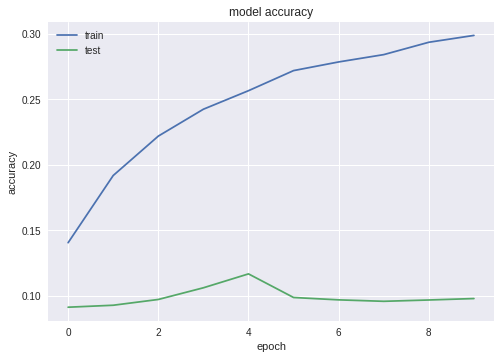

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

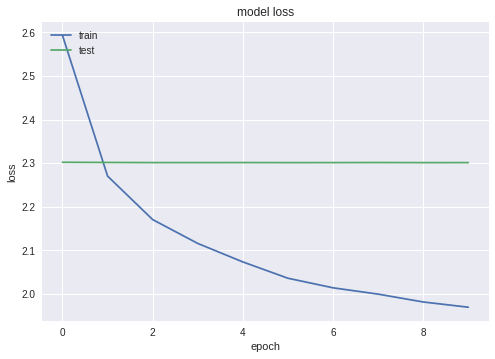

In [61]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Fine tune the last convolution block

In [72]:
input_tensor = Input(shape=(32, 32, 3))
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    #input_shape=(target_size, target_size, 3),
    pooling='avg')

for layer in base_model.layers[:-12]:
    layer.trainable = False  # trainable has to be false in order to freeze the layers

op = Dense(256, activation='relu')(base_model.output)
op = Dropout(.25)(op)

##
# softmax: calculates a probability for every possible class.
#
# activation='softmax': return the highest probability;
# for example, if 'Coat' is the highest probability then the result would be 
# something like [0,0,0,0,1,0,0,0,0,0] with 1 in index 5 indicate 'Coat' in our case.
##
output_tensor = Dense(10, activation='softmax')(op)

mobilenet2 = Model(inputs=base_model.input, outputs=output_tensor)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [0]:
mobilenet2.compile(SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = mobilenet2.fit(x_train, y_train,
          batch_size=32,
          epochs=30,
          shuffle=True,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[EarlyStopping(patience=2)]
                         
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 66s 1ms/step - loss: 2.3459 - acc: 0.2135 - val_loss: 3.1537 - val_acc: 0.1125
Epoch 2/30
50000/50000 [==============================] - 39s 781us/step - loss: 1.9470 - acc: 0.3161 - val_loss: 3.0630 - val_acc: 0.1234
Epoch 3/30
50000/50000 [==============================] - 40s 797us/step - loss: 1.8274 - acc: 0.3565 - val_loss: 3.0220 - val_acc: 0.1244
Epoch 4/30
50000/50000 [==============================] - 37s 746us/step - loss: 1.7613 - acc: 0.3734 - val_loss: 2.9845 - val_acc: 0.1277
Epoch 5/30
50000/50000 [==============================] - 35s 703us/step - loss: 1.7171 - acc: 0.3914 - val_loss: 2.9297 - val_acc: 0.1263
Epoch 6/30
50000/50000 [==============================] - 40s 796us/step - loss: 1.6834 - acc: 0.4019 - val_loss: 2.9408 - val_acc: 0.1285
Epoch 7/30
50000/50000 [==============================] - 39s 777us/step - loss: 1.6540 - acc: 0.4141 - val_loss: 2.92

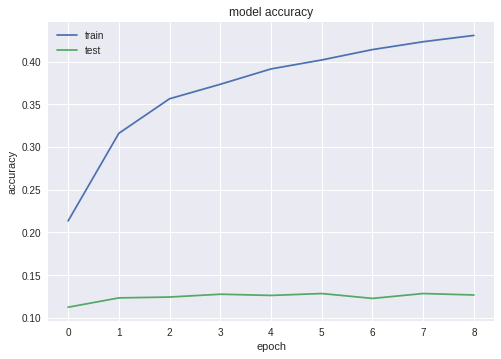

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

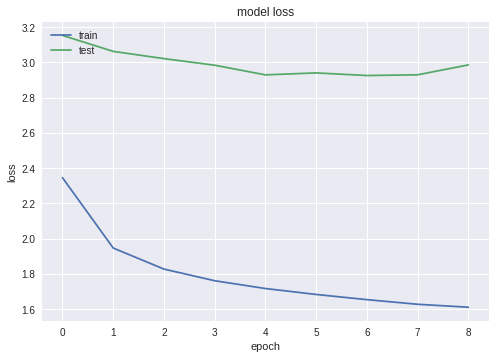

In [76]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Fine tune the entire model

In [105]:
mobilenet3 = build_model(trainable=True)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [0]:
mobilenet3.compile(SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
history = mobilenet3.fit(x_train, y_train,
          batch_size=32,
          epochs=18,
          shuffle=True,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[EarlyStopping(patience=2)]
                         
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/18
50000/50000 [==============================] - 177s 4ms/step - loss: 2.0817 - acc: 0.2887 - val_loss: 1.6556 - val_acc: 0.4245
Epoch 2/18
50000/50000 [==============================] - 136s 3ms/step - loss: 1.5285 - acc: 0.4660 - val_loss: 1.4135 - val_acc: 0.5248
Epoch 3/18
50000/50000 [==============================] - 136s 3ms/step - loss: 1.3310 - acc: 0.5338 - val_loss: 1.3022 - val_acc: 0.5802
Epoch 4/18
50000/50000 [==============================] - 138s 3ms/step - loss: 1.1953 - acc: 0.5861 - val_loss: 1.1648 - val_acc: 0.6297
Epoch 5/18
50000/50000 [==============================] - 135s 3ms/step - loss: 1.1030 - acc: 0.6192 - val_loss: 1.0953 - val_acc: 0.6528
Epoch 6/18
50000/50000 [==============================] - 136s 3ms/step - loss: 1.0408 - acc: 0.6427 - val_loss: 1.0557 - val_acc: 0.6589
Epoch 7/18
50000/50000 [==============================] - 135s 3ms/step - loss: 0.9955 - acc: 0.6605 - val_loss: 0.9851 - 

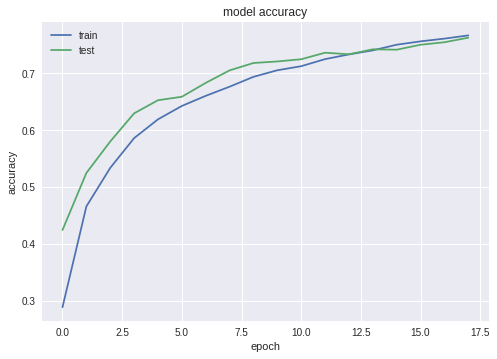

In [108]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

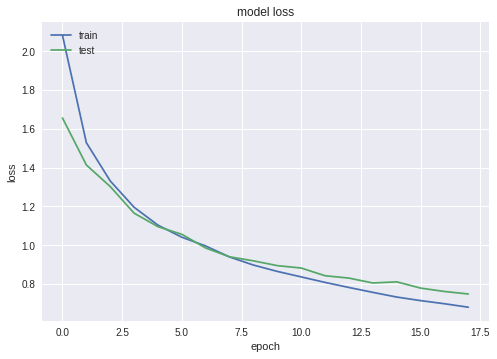

In [109]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()